In [21]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

filename = '/home/dneil/temp/datasets/rec1487839456_frames.hdf5'

In [12]:
dataset = h5py.File(filename, 'r')
print('Dataset contains:')
for key in dataset.keys():
    if np.prod(dataset[key].shape)<1e8:
        data = np.array(dataset[key])
    else:
        data = np.array(dataset[key][:1000])
    print('  {}, Min: {}, Mean: {}, Max: {}, size: {}'.format(
        key, np.min(data), np.mean(data), np.max(data), dataset[key].shape))

Dataset contains:
  accelerator_pedal_position, Min: 0.0, Mean: 4.69807135723, Max: 16.9, size: (40960,)
  aps_frame, Min: 0.0, Mean: 0.0, Max: 0.0, size: (40960,)
  brake_pedal_status, Min: 0.0, Mean: 0.384057617187, Max: 1.0, size: (40960,)
  dvs_frame, Min: -10, Mean: 0.00608023566029, Max: 6, size: (40960, 260, 346)
  dvs_frame_60x80, Min: 124, Mean: 127.002015417, Max: 130, size: (40960, 60, 80)
  engine_speed, Min: 0.0, Mean: 1028.70166016, Max: 1882.0, size: (40960,)
  fuel_consumed_since_restart, Min: 0.0, Mean: 0.100717302856, Max: 0.164125, size: (40960,)
  fuel_level, Min: 0.0, Mean: 44.4077372103, Max: 44.782749, size: (40960,)
  headlamp_status, Min: 0.0, Mean: 0.0, Max: 0.0, size: (40960,)
  high_beam_status, Min: 0.0, Mean: 0.0, Max: 0.0, size: (40960,)
  ignition_status, Min: 0.0, Mean: 1.98344726562, Max: 2.0, size: (40960,)
  latitude, Min: 0.0, Mean: 47.0030229192, Max: 47.390308, size: (40960,)
  longitude, Min: 0.0, Mean: 8.45287238679, Max: 8.53034, size: (40960,)

In [13]:
def plot_steering_angle(angle):
    a_rad = angle / 180. * np.pi + np.pi / 2
    c, r = (173, 130), 65 #center, radius
    t = (c[0] + int(np.cos(a_rad) * r), c[1] - int(np.sin(a_rad) * r))
    plt.plot((c[0], t[0]), (c[1], t[1]), 'r')
    plt.gca().add_artist(plt.Circle(c, r, edgecolor='r', facecolor='none'))
    plt.text(c[0]-35, c[1]+30, '{:0.1f} deg'.format(angle), color='r')
print('Function defined.')

Function defined.


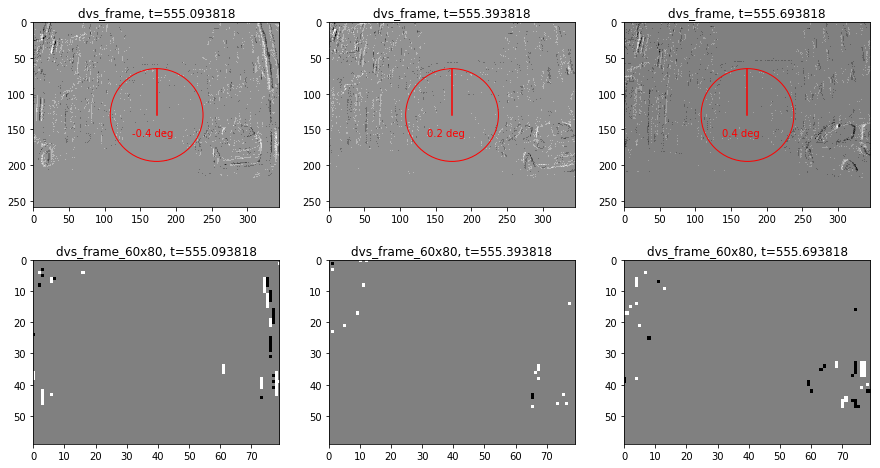

In [23]:
view_idx = 10
num_frames = 3
spacing = 30

filename = '/home/dneil/temp/datasets/rec1487839456_bin10ms.hdf5'
dataset = h5py.File(filename, 'r')

dataset_name = 'dvs_frame'
dataset_name2 = 'dvs_frame_60x80'

plt.figure(figsize=(5*num_frames,8))
for idx in range(num_frames):
    plt.subplot(2, num_frames, idx+1)
    plt.title('{}, t={}'.format(dataset_name, dataset['timestamp'][view_idx+idx*spacing]))
    plt.imshow(dataset[dataset_name][view_idx+idx*spacing], cmap='gray')
    plot_steering_angle(dataset['steering_wheel_angle'][view_idx+idx*spacing])
    plt.xlim([0, dataset[dataset_name][view_idx+idx*spacing].shape[1]-1])
    plt.ylim([dataset[dataset_name][view_idx+idx*spacing].shape[0]-1, 0])    

    plt.subplot(2, num_frames, num_frames+idx+1)
    plt.title('{}, t={}'.format(dataset_name2, dataset['timestamp'][view_idx+idx*spacing]))    
    plt.imshow(dataset[dataset_name2][view_idx+idx*spacing], cmap='gray')
#    plot_steering_angle(dataset['steering_wheel_angle'][view_idx+idx])
    plt.xlim([0, dataset[dataset_name2][view_idx+idx*spacing].shape[1]-1])
    plt.ylim([dataset[dataset_name2][view_idx+idx*spacing].shape[0]-1, 0]) 

dataset.close()
plt.savefig('resize.png')

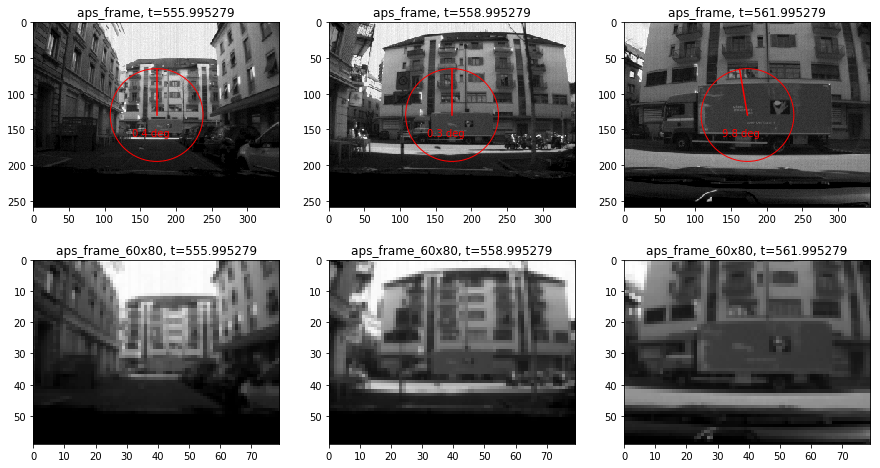

In [25]:
view_idx = 10
num_frames = 3
spacing = 30

filename = '/home/dneil/temp/datasets/rec1487839456_frames.hdf5'
dataset = h5py.File(filename, 'r')

dataset_name = 'aps_frame'
dataset_name2 = 'aps_frame_60x80'

plt.figure(figsize=(5*num_frames,8))
for idx in range(num_frames):
    plt.subplot(2, num_frames, idx+1)
    plt.title('{}, t={}'.format(dataset_name, dataset['timestamp'][view_idx+idx*spacing]))
    plt.imshow(dataset[dataset_name][view_idx+idx*spacing], cmap='gray')
    plot_steering_angle(dataset['steering_wheel_angle'][view_idx+idx*spacing])
    plt.xlim([0, dataset[dataset_name][view_idx+idx*spacing].shape[1]-1])
    plt.ylim([dataset[dataset_name][view_idx+idx*spacing].shape[0]-1, 0])    

    plt.subplot(2, num_frames, num_frames+idx+1)
    plt.title('{}, t={}'.format(dataset_name2, dataset['timestamp'][view_idx+idx*spacing]))    
    plt.imshow(dataset[dataset_name2][view_idx+idx*spacing], cmap='gray')
#    plot_steering_angle(dataset['steering_wheel_angle'][view_idx+idx])
    plt.xlim([0, dataset[dataset_name2][view_idx+idx*spacing].shape[1]-1])
    plt.ylim([dataset[dataset_name2][view_idx+idx*spacing].shape[0]-1, 0]) 

dataset.close()
plt.savefig('resize.png')

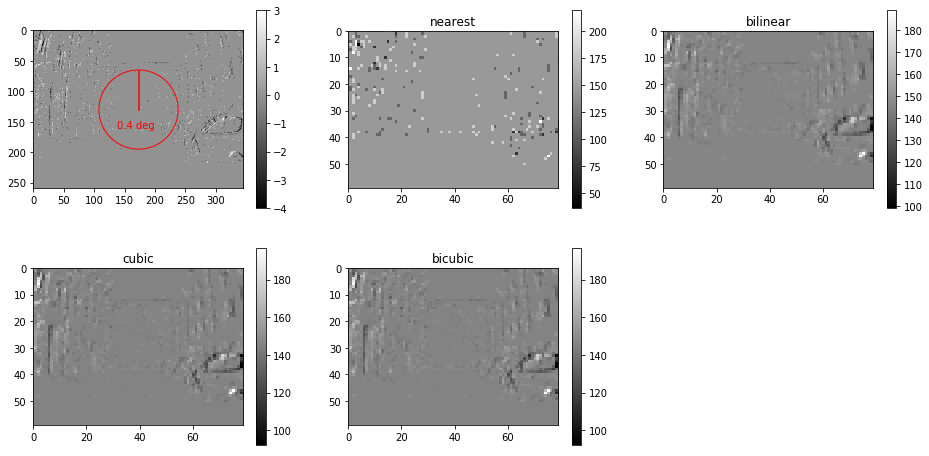

In [60]:
from scipy.misc import imresize

filename = '/home/dneil/temp/datasets/rec1487839456_bin10ms.hdf5'
dataset = h5py.File(filename, 'r')

dataset_name = 'dvs_frame'
dataset_name2 = 'dvs_frame_60x80'

view_idx = 80

def resize_int16(frame, size=(60,80), method='bilinear'):
    # Assumes data is some small amount around the mean, i.e., DVS event sums
    return imresize((frame+127).astype('float32'), size, interp=method).astype('uint8')

plt.figure(figsize=(16,8))
plt.subplot(2, 3, 1)
plt.imshow(dataset[dataset_name][view_idx], cmap='gray')
plot_steering_angle(dataset['steering_wheel_angle'][view_idx])
plt.xlim([0, dataset[dataset_name][view_idx].shape[1]-1])
plt.ylim([dataset[dataset_name][view_idx].shape[0]-1, 0])    
plt.colorbar()

plt.subplot(2, 3, 2)
plt.imshow(resize_int16(dataset[dataset_name][view_idx], method='nearest'), cmap='gray')
plt.xlim([0, 80-1])
plt.ylim([60-1, 0])    
plt.colorbar()
plt.title('nearest')

plt.subplot(2, 3, 3)
plt.imshow(resize_int16(dataset[dataset_name][view_idx], method='bilinear'), cmap='gray')
plt.xlim([0, 80-1])
plt.ylim([60-1, 0])    
plt.colorbar()
plt.title('bilinear')

plt.subplot(2, 3, 4)
plt.imshow(resize_int16(dataset[dataset_name][view_idx], method='cubic'), cmap='gray')
plt.xlim([0, 80-1])
plt.ylim([60-1, 0])    
plt.colorbar()
plt.title('cubic')

plt.subplot(2, 3, 5)
plt.imshow(resize_int16(dataset[dataset_name][view_idx], method='bicubic'), cmap='gray')
plt.xlim([0, 80-1])
plt.ylim([60-1, 0])    
plt.colorbar()
plt.title('bicubic')

plt.savefig('with_float.png')


In [26]:

filename = '/home/dneil/datasets/driving/rec1487864316_bin5k.hdf5'
dataset = h5py.File(filename, 'r')
train_idxs = dataset['train_idxs']                    
test_idxs = dataset['test_idxs']                    
times = dataset['timestamp']
orig_times = dataset['orig_timestamp']
plt.figure(figsize=(12,5))
plt.plot(train_idxs, orig_times[train_idxs], 'g.')
plt.plot(test_idxs, orig_times[test_idxs], 'g.')
plt.plot(train_idxs, times[train_idxs], 'r.')
plt.plot(test_idxs, times[test_idxs], 'b.')
# plt.title('Shared keys: {}'.format(set().intersection(dataset['train_idxs'], dataset['test_idxs'])))
plt.grid(which='both')
plt.ylabel('Time [s]')
plt.xlabel('Event #')
plt.savefig('timestamp_reset.png')

IOError: Unable to open file (Unable to open file: name = '/home/dneil/datasets/driving/rec1487864316_bin5k.hdf5', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [ ]:
filename = '/home/dneil/datasets/driving/rec1487864316_bin10ms.hdf5'
f = h5py.File(filename, 'r')
times = np.array(f['timestamp'])
times[times==0] = np.nan
plt.plot(times)
print(np.nanmin(times), np.nanmax(times), np.nanmax(times)-np.nanmin(times))
# filename = '/home/dneil/datasets/driving/rec1487864316_bin5k.hdf5'
# f = h5py.File(filename, 'r')
# times = np.array(f['timestamp'])
# times[times==0] = np.nan
# plt.plot(times)
# print(np.nanmin(times), np.nanmax(times), np.nanmax(times)-np.nanmin(times))

In [ ]:
filename = '/home/dneil/datasets/driving/rec1487864316.hdf5'
f = h5py.File(filename, 'r')
print('Dataset contains:')
for key in f.keys():
    if hasattr(f[key]['data'], 'shape') and np.prod(f[key]['data'].shape)<1e6:
        data = np.array(f[key]['data'])
        length = data.shape
    else:
        data = np.array(f[key]['data'][:1000])
        length = data.shape
    print('  {}, size: {}'.format(
        key, data.shape))

print(len(f['accelerator_pedal_position/timestamp']))

In [ ]:
all_idxs = np.sort(np.array(dataset['train_idxs']))
print(len(all_idxs))
jumps = np.where(np.diff(all_idxs)>1)[0]
print(diffs)
print(all_idxs[42368],all_idxs[42369])
print([0,]+list(jumps+1))
print(list(jumps+1)+[len(all_idxs)])
print all_idxs[42367], all_idxs[42368], all_idxs[42369]
print all_idxs[88649], all_idxs[88650], all_idxs[88651], all_idxs[126329]